# 데이터 시각화

- 데이터 시각화의 목적
    - 데이터 탐색
    - 데이터 전달

- 주로 사용되는 차트
    - 라인 플롯(line plot)
    - 스캐터 플롯(scatter plot)
    - 컨투어 플롯(contour plot)
    - 서피스 플롯(surface plot)
    - 바 차트(bar chart)
    - 히스토그램(histogram)
    - 박스 플롯(box plot)
    
- 위 차트들만 잘 사용해도 대부분의 통계분석은 커버가 가능하다.

## 1. matplotlib

>- http://matplotlib.org/
- matplotlib의 서브패키지인 pyplot 사용

In [2]:
# 항상 matplotlib의 서브 패키지인 pyplot을 불러온다.

from matplotlib import pyplot as plt ## 관습적으로 alias를 plt로 사용한다.

- x 축에 연도, y축에는 GDP가 있는 선 그래프를 만들자.

In [3]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

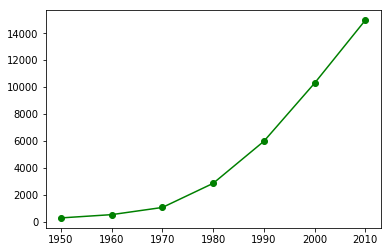

In [4]:
plt.plot(years,               # x 값
         gdp,                 # y 값
         color = 'green',     # 선 색깔
         marker = 'o',        # 데이터 포인트 스타일
         linestyle = 'solid') # 선 스타일

Text(0.5,1,'Nominal GDP')

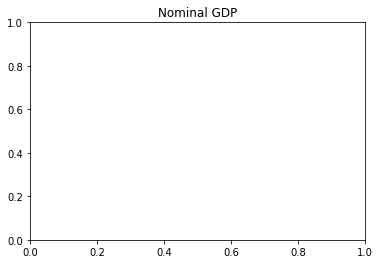

In [5]:
# 제목
plt.title('Nominal GDP')

Text(0,0.5,'Bilions of $')

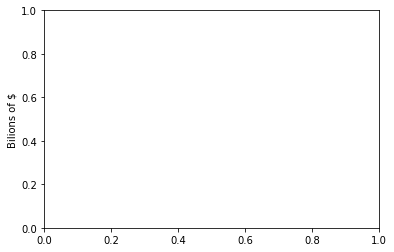

In [6]:
# y축 레이블
plt.ylabel('Bilions of $')

In [7]:
# plotting
plt.show()

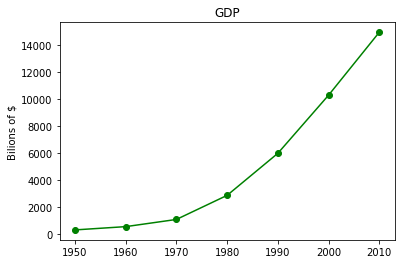

In [8]:
## 모든 과정을 하나의 셀에다가 적어주어도  된다.
plt.plot(years, gdp, color = 'green', marker = 'o', linestyle = 'solid')
plt.title('GDP')
plt.ylabel('Bilions of $')
plt.show()

## 2. 막대 그래프

>- 주로 이산적인 항목들의 변화를 보여줄 때 사용한다.
- x와 y에는 문자열이 올수 없기 때문에 어떤 집단의 빈도수 같은 경우에는 집단의 x 좌표를 임의로 설정해주고, x값에 레이블을 다시 달아주어야된다.
    - matplotlib 2.2 버전부터는 이 문제가 발생하지 않는다.

- 아카데미 시상식에서 받은 상의 개수를 나타내어 보자

In [9]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

<Container object of 5 artists>

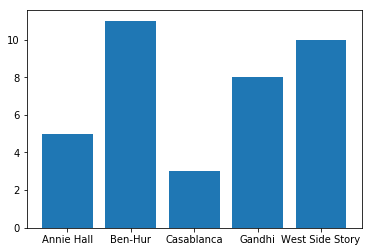

In [10]:
## x값 위치에 문자열을 그대로 입력해주면 에러가 난다.
plt.bar(movies, num_oscars)

In [11]:
# 막대너비의 기본값은 0.8이므로, 막대가 가운데로 올 수 있도록 왼쪽 좌표에 0.1씩 더해주자
xs = [i + 0.1 for i, _ in enumerate(movies)]
# xs = [0.1, 1.1, 2.1, 3.1, 4.1], 일반적은로 _ 변수는 쓰지 않는 변수를 할당할 때 사용함

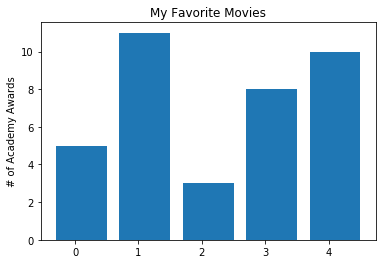

In [12]:
# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

plt.show()

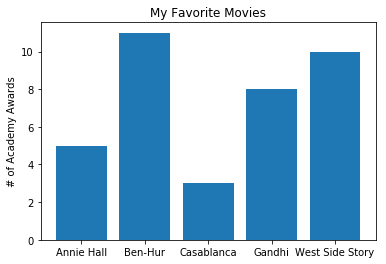

In [13]:
# 막대의 가운데에 영화 제품 레이블이 오게 만들자.

plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
plt.xticks([i + 0.1 for i, _ in enumerate(movies)], movies)
plt.show()

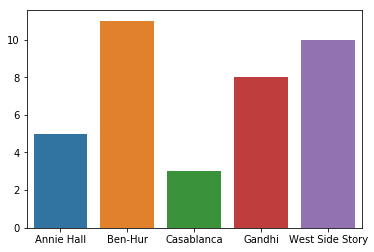

In [14]:
## seaborn이라는 패키지를 사용하면 더 쉽게 표현할 수 있다.
## seaborn 예제

import seaborn as sns
sns.barplot(movies, num_oscars)
plt.show()

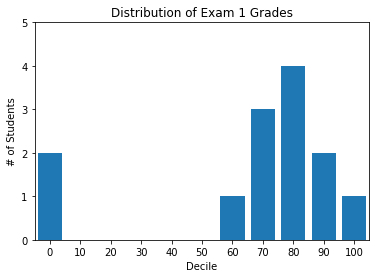

In [15]:
from collections import Counter

grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10

histogram = Counter(decile(grade) for grade in grades)
# Counter([grade // 10 * 10 for grade in grades])
# Counter({80: 4, 70: 3, 0: 2, 90: 2, 100: 1, 60: 1})

plt.bar([x for x in histogram.keys()],     
        histogram.values(),                # give each bar its correct height
        8)                                 # give each bar a width of 8
plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

In [ ]:
############################# 스터디원 코드 #############################





- y축 범위를 임의로 조작해서 스케일을 바꿔버리면 데이터 전달에 오해를 불러일으킨다. 객관적인 데이터 전달을 위해서는 의도를 가지고 y축 스케일을 조작하지 않도록 한다.

## 3. 선 그래프

> - 데이터의 경향을 보여줄 때 유용하다.

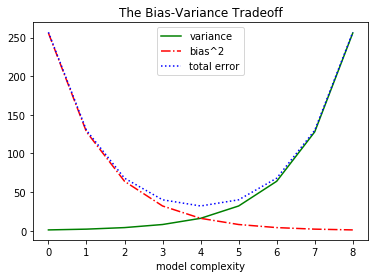

In [16]:
variance     = [1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,32,16,8,4,2,1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
# [257, 130, 68, 40, 32, 40, 68, 130, 257]

xs = range(len(variance))

# 한 차트에 여러개의 series를 그리기 위해 plt.plot을 여러번 호출할 수 있다.

plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# because we've assigned labels to each series
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

# 참고 자료
> https://python-graph-gallery.com/